# Suicide Rates Overview 1985 to 2016

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">About DataSet

Our aim is to make general analysis of suicide rates and we will explain these rates in detail.

Dataset Feature List

    country
    year
    sex
    age
    suicides_no
    population
    suicides/100k pop
    country-year
    HDI for year
    gdp_for_year
    gdp_per_capita
    generation

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Bivariate Analysis

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.1 Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.2 import the dataset ?

In [34]:
data=pd.read_csv('master.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.3 check the data head()

In [35]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.4 Check the data.describe()

In [36]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.5 Check the columns 

In [37]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.6 Checking the shape of data?

In [39]:
data.shape

(27820, 12)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.7 Count the datatypes?

In [40]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.8 Check the data set infoermation?

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.9  Checking the dataset missing values?

In [42]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    #print("Missing check:",missing_data )
    return missing_data
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
generation,0,0.000000
gdp_per_capita ($),0,0.000000
gdp_for_year ($),0,0.000000
country-year,0,0.000000
suicides/100k pop,0,0.000000
population,0,0.000000
suicides_no,0,0.000000
age,0,0.000000
sex,0,0.000000


In [43]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.10 Frequency table for Age? 

One-Way Tables

In [44]:
my_tab = pd.crosstab(index=data["age"],  # Make a crosstab
                     columns="count")                  # Name the count column
my_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.11 Bar plot to check Number of Suicides by top Countries 30

<Figure size 1080x360 with 0 Axes>

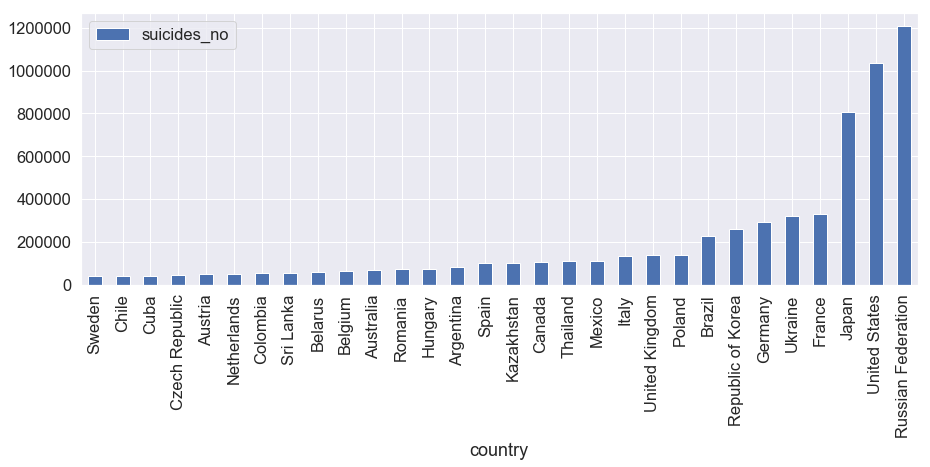

In [45]:
figure = plt.figure(figsize=(15,5))
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).tail(30).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.12 Bar plot to check Number of Suicides by bottom Countries 30

<Figure size 1080x360 with 0 Axes>

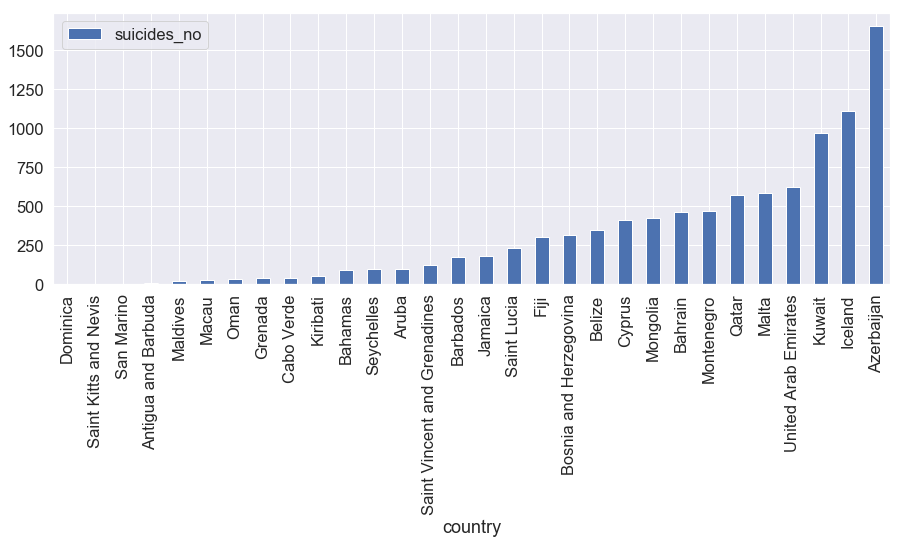

In [46]:
figure = plt.figure(figsize=(15,5))
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(30).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.13 Bar plot for Number of Suicides Vs Age

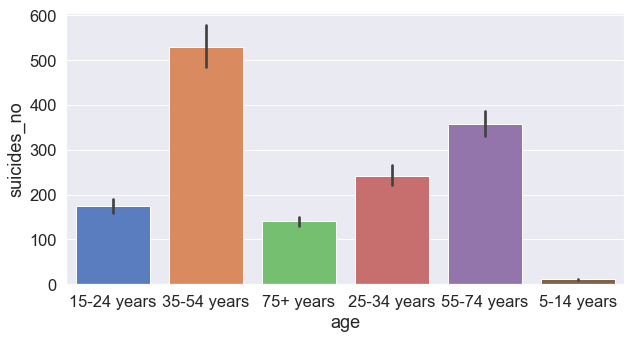

In [47]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='age', y='suicides_no', data=data,palette='muted');

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.14 Bar plot  Number of Suicides Vs SEX

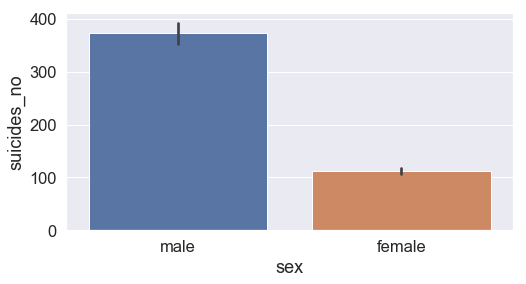

In [48]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=data)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.15 Scatter plot Number of Suicides Vs population

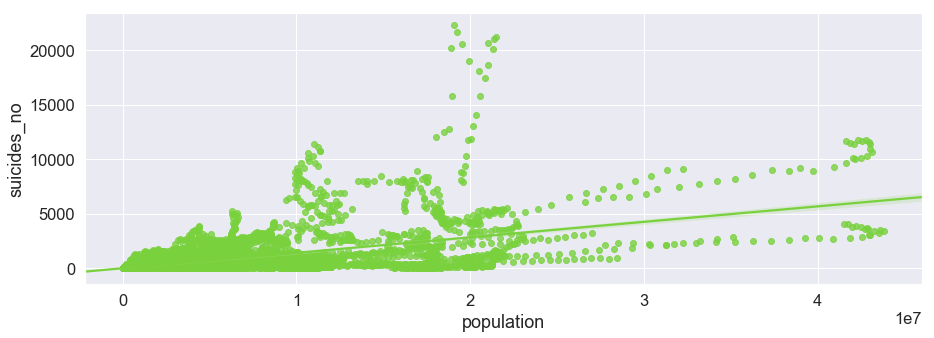

In [49]:
figure = plt.figure(figsize=(15,5))
ax = sns.regplot(x=data['population'],y='suicides_no', data=data, color='#79d13e')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.16 Bar plot Number of Suicides Vs generation

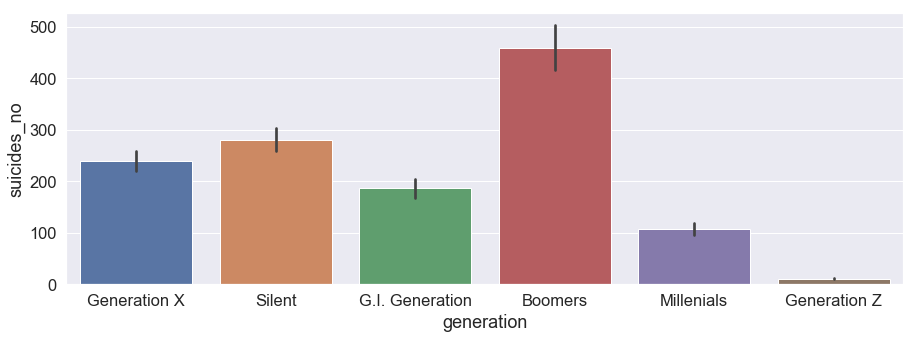

In [50]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='generation', y='suicides_no', data=data);

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.17 Bar plot To check Number of suicides by sex and age

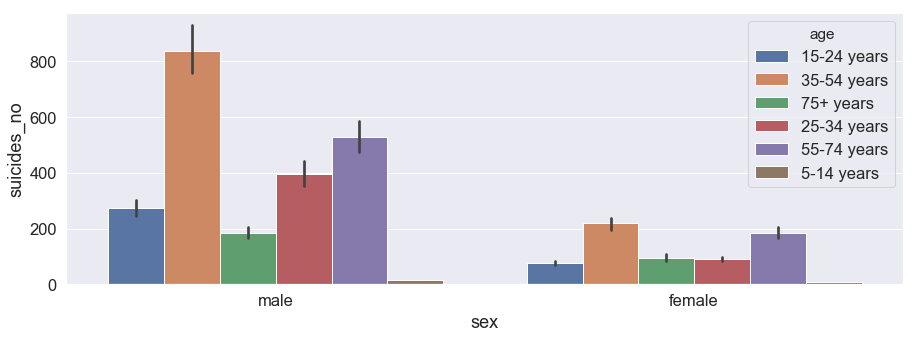

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='age')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.18 Checking the No.of suicides: Country Vs Sex?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


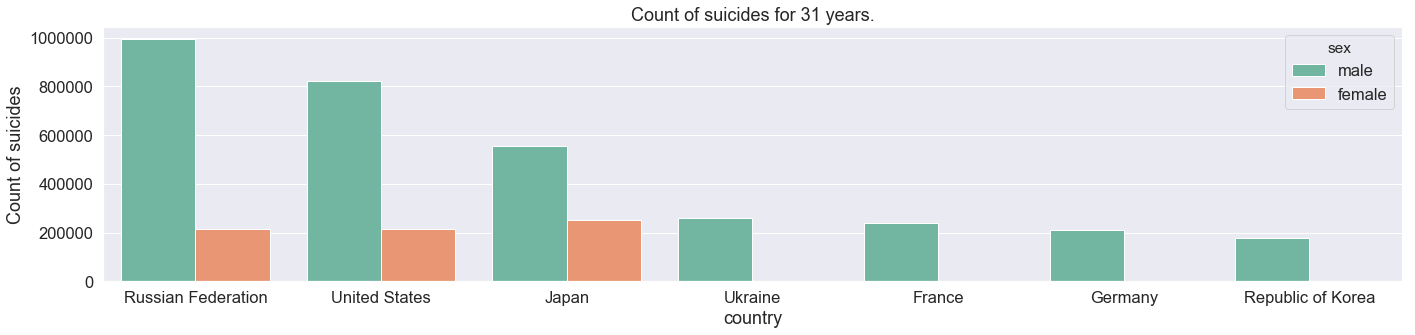

In [52]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(10)
most_cont_m.head(10)
fig = plt.figure(figsize=(20,5))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides_no',x='country',hue='sex',data=most_cont_m,palette='Set2');
plt.ylabel('Count of suicides')
plt.tight_layout()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.19 Checking pattern using Trend plot (1985-2015) suides Rate Vs Years

<Figure size 1440x360 with 0 Axes>

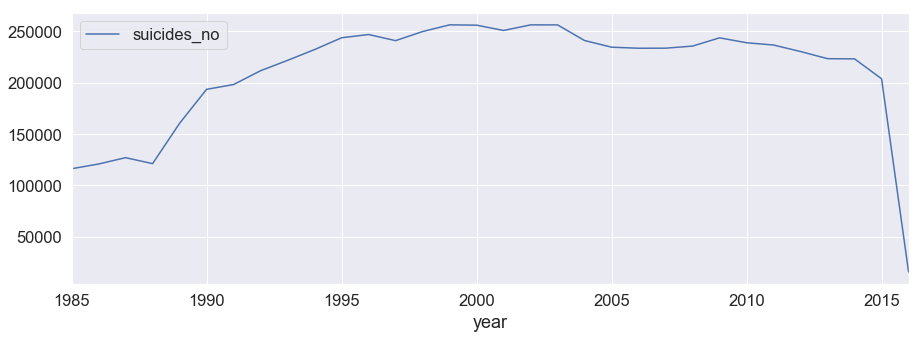

In [56]:
fig = plt.figure(figsize=(20,5))
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.19 Checking pattern using Trend plot (1985-2015) Population Vs Years

<Figure size 1440x360 with 0 Axes>

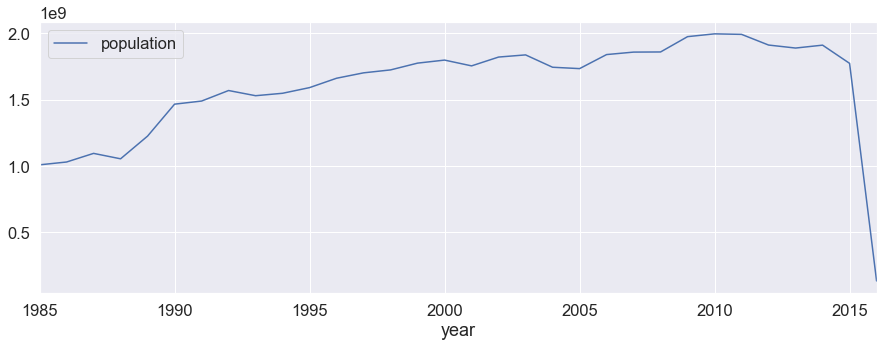

In [95]:
fig = plt.figure(figsize=(20,5))
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1.19 Checking pattern using Trend plot (1985-2015) suicides/100k pop Vs Years

<Figure size 1440x360 with 0 Axes>

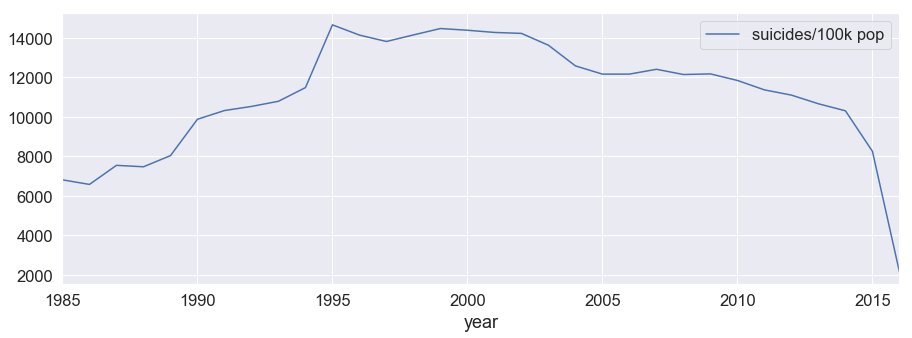

In [97]:
fig = plt.figure(figsize=(20,5))
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.20 Copy the data For Labele Encoding?

In [64]:
data2 = data.copy()


###  Generation

In [65]:
data2["generation"] = data2["generation"].astype('category')
data2.dtypes

country                 object
year                     int64
sex                     object
age                     object
suicides_no              int64
population               int64
suicides/100k pop      float64
country-year            object
HDI for year           float64
 gdp_for_year ($)       object
gdp_per_capita ($)       int64
generation            category
dtype: object

In [66]:
data2["generation"] = data2["generation"].cat.codes
data2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,2
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,5
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,2
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,1
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.20 Another way of Lable Encoding?

In [67]:
copy_data = data.copy()
copy_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

### SEX

In [68]:
copy_data['sex'] = copy_data['sex'].map({'female':0, 'male':1}).astype(int)

### Generation

In [70]:
copy_data['generation'] = copy_data['generation'].map({'Boomers':0, 'G.I. Generation':1, 'Generation X':2,'Generation Z':3,'Millenials':4,'Silent':5}).astype(int)

### Age

In [71]:
Age_Range = copy_data['age'].astype('category').cat.categories.tolist()
Age_Range

['15-24 years',
 '25-34 years',
 '35-54 years',
 '5-14 years',
 '55-74 years',
 '75+ years']

In [72]:
Replace_map = {'age' : {k: v for k,v in zip(Age_Range,list(range(1,len(Age_Range)+1)))}}

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.21 Finally Data is transformed Liitel Bit?

In [73]:
copy_data.replace(Replace_map, inplace=True)
copy_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,1,1,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,2
1,Albania,1987,1,3,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,5
2,Albania,1987,0,1,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,2
3,Albania,1987,1,6,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,1
4,Albania,1987,1,2,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.22 Check the correlation in heat map?

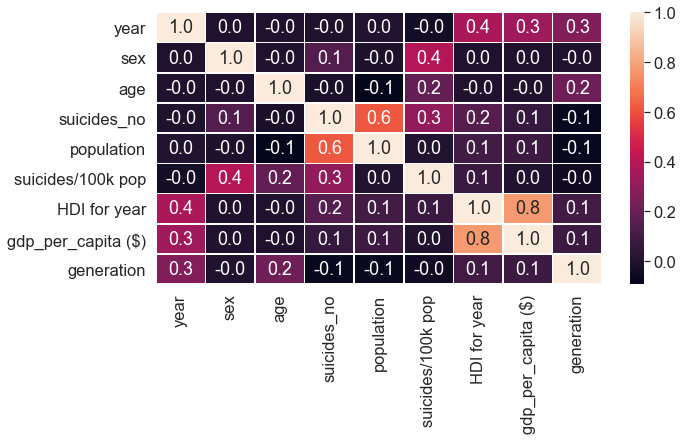

In [74]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(copy_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.23 Seasonality and looking at trended data

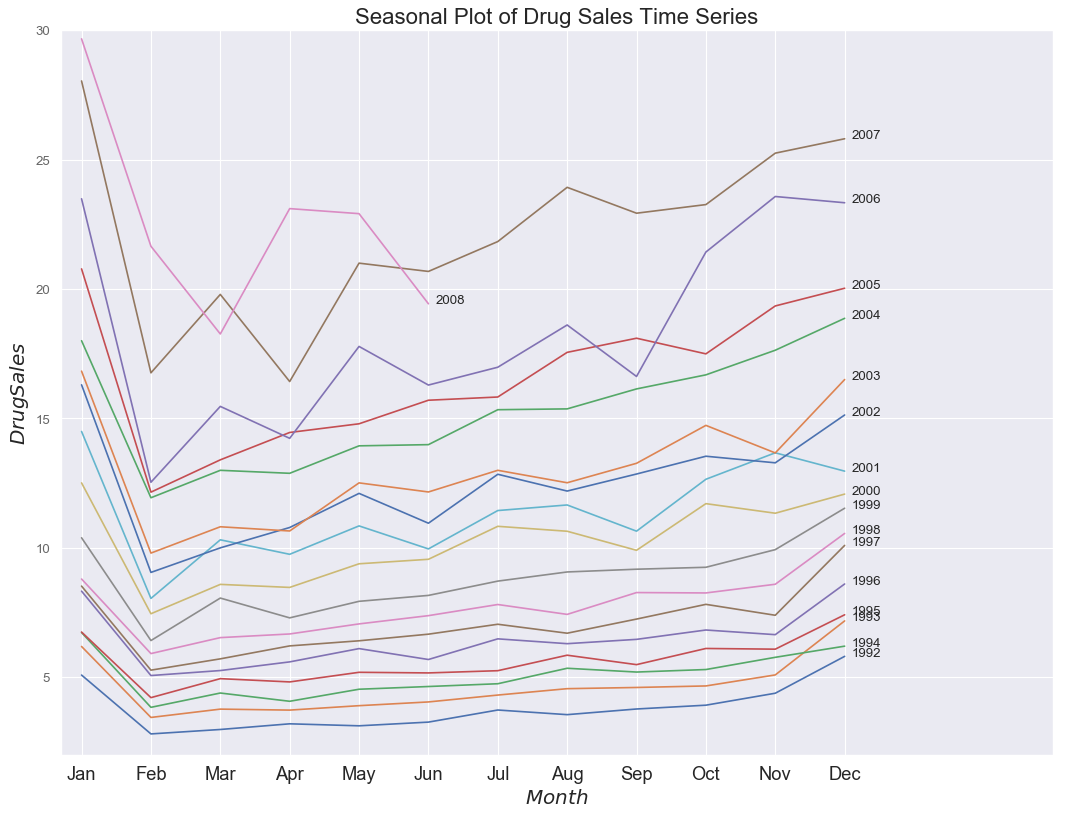

In [115]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12)

# Decoration
plt.gca().set(xlim=(-0.3, 14), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#ed0027"> THE END 